<a href="https://colab.research.google.com/github/leenago/Asiae_edu/blob/master/Industrial_Bigdata/200916_StockAnalysis_CJ%EC%A0%9C%EC%9D%BC%EC%A0%9C%EB%8B%B9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 주가정보 획득 작업
- 마케팅 포인트와 주가와의 상관관계 분석을 하고자 한다.
- 식품기업 위주의 주가분석을 하기로 했다.
- '네이버 증권' 페이지에 가서 관심있는 회사의 주가정보를 크롤링했다.(https://finance.naver.com/item/sise_day.nhn?code=097950&page=1)

# 1.사전작업
- 필요 패키지 설치하기

In [1]:
%config InlineBackend.figure_format = 'retina'
!apt -qq -y install fonts-nanum
#맨 처음 실행 후
#런타임 -> 런타임 다시시작 -> 이 셀은 실행하지 않고 밑셀부터 다시 시작

The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 11 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Selecting previously unselected package fonts-nanum.
(Reading database ... 144676 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [86]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib.gridspec as gridspec

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()
mpl.pyplot.rc('font', family='NanumGothic')
fm._rebuild()


import requests
from bs4 import BeautifulSoup as bs

In [9]:
!pip install mpl_finance

#2.네이버 증권 웹크롤링
- CJ제일제당 코드: 097950

In [18]:
def one_page_crawling(code,page):
  url = 'https://finance.naver.com/item/sise_day.nhn?code={code}&page={page}'.format(code=code, page=page)
  df = pd.read_html(url)[0]
  df.dropna(inplace=True)
  #dropna: removing missing values
  #inplace: if True, do operation inplace and return None
  df['날짜'] = df['날짜'].apply(lambda x : str(x).replace('.',''))
  df['날짜'] = df['날짜'].astype('int')
  df.columns = ['DATE','CLOSEP','COMPARE','OPENP','HIGHP','LOWP','VOL']
  return df


In [19]:
one_page_crawling('097950',1)

,DATE,CLOSEP,COMPARE,OPENP,HIGHP,LOWP,VOL
1,20200917,387000.0,6000.0,393000.0,396000.0,386000.0,51334.0
2,20200916,393000.0,1000.0,395000.0,402000.0,392500.0,48945.0
3,20200915,394000.0,2000.0,392000.0,396000.0,388000.0,47654.0
4,20200914,392000.0,11500.0,403500.0,404000.0,388000.0,100636.0
5,20200911,403500.0,2000.0,401500.0,416500.0,399500.0,108033.0
9,20200910,401500.0,26000.0,381500.0,404500.0,380000.0,172970.0
10,20200909,375500.0,14000.0,385000.0,388500.0,373000.0,138771.0
11,20200908,389500.0,0.0,392500.0,396000.0,389500.0,60046.0
12,20200907,389500.0,7000.0,399000.0,399500.0,387500.0,72911.0
13,20200904,396500.0,5000.0,394500.0,400000.0,393000.0,69718.0


In [20]:
def sev_page_crawling(code, page):
  url = 'https://finance.naver.com/item/sise_day.nhn?code={code}&page={page}'.format(code=code, page=page)
  df = pd.DataFrame() #empty DataFrame 만들어주기
  for i in range(1,page+1):
    new_df = one_page_crawling(code,i)
    df = pd.concat([df,new_df], axis=0)
    #Concatenate pandas objects along a particular axis with optional set logic along the other axes.
    #axis : {0/'index', 1/'columns'}, default 0: The axis to concatenate along.
  
  df.dropna(inplace=True)
  df.reset_index(inplace=True, drop=True)
  #Reset the index, or a level of it.
  #inplace: Modify the DataFrame in place (do not create a new object).
  #drop: Do not try to insert index into dataframe columns. This resets the index to the default integer index.

  return df


In [21]:
CJ_cj = sev_page_crawling('097950',321)
CJ_cj

,DATE,CLOSEP,COMPARE,OPENP,HIGHP,LOWP,VOL
0,20200917,387000.0,6000.0,393000.0,396000.0,386000.0,51334.0
1,20200916,393000.0,1000.0,395000.0,402000.0,392500.0,48945.0
2,20200915,394000.0,2000.0,392000.0,396000.0,388000.0,47654.0
3,20200914,392000.0,11500.0,403500.0,404000.0,388000.0,100636.0
4,20200911,403500.0,2000.0,401500.0,416500.0,399500.0,108033.0
...,...,...,...,...,...,...,...
3204,20071005,252500.0,2500.0,255000.0,257000.0,245000.0,112563.0
3205,20071004,255000.0,10000.0,247000.0,263000.0,241000.0,221795.0
3206,20071002,245000.0,25000.0,229000.0,247500.0,226000.0,239345.0
3207,20071001,220000.0,10000.0,230000.0,233000.0,220000.0,267416.0


#3.BigQuery와 연동

In [22]:
from pandas.io import gbq
CJ_cj.to_gbq(destination_table = 'NaverStock.CJ_cj',
             project_id='stockcj',
             if_exists='replace')

1it [00:03,  3.16s/it]


# 4.주가 분석

## 1) 전체 주가 시각화

In [27]:
from pandas.io import gbq

project_id = 'stockcj'
sql = """SELECT DATE,OPENP,CLOSEP,HIGHP,LOWP,VOL
FROM `NaverStock.CJ_cj`
ORDER BY DATE desc"""

CJ_cj = pd.read_gbq(sql, project_id = project_id, dialect= 'standard')

In [30]:
print(CJ_cj[CJ_cj['CLOSEP']==CJ_cj['CLOSEP'].max()])
print('\n')
print(CJ_cj[CJ_cj["CLOSEP"]==CJ_cj['CLOSEP'].min()])

          DATE     OPENP    CLOSEP     HIGHP      LOWP      VOL
1311  20150521  448000.0  458500.0  460500.0  446000.0  47131.0


          DATE     OPENP    CLOSEP     HIGHP     LOWP       VOL
2943  20081027  105500.0  101000.0  113000.0  96500.0  213114.0


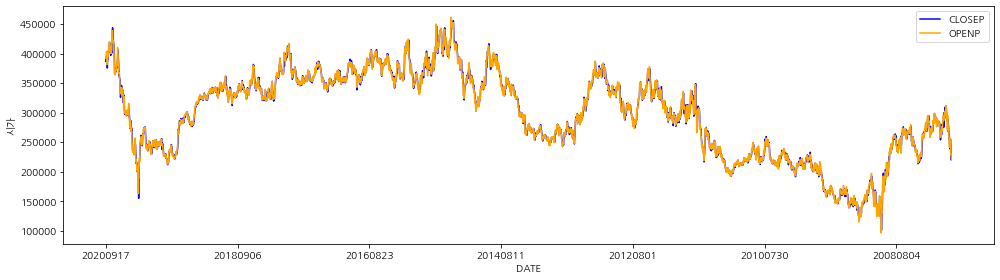

In [36]:
CJ_cj['DATE']=CJ_cj['DATE'].astype('str')
plt.rcParams['figure.figsize'] = (14,4)
ax1 = CJ_cj.plot(kind='line', x='DATE', y='CLOSEP',color='Blue')
ax2 = CJ_cj.plot(kind='line', x='DATE', y='OPENP', color='Orange', ax=ax1)
ax1.set_ylabel('종가')
ax2.set_ylabel('시가')

plt.tight_layout()
plt.show()

- 2020년에 보이는 폭락의 요인은 코로나일 것이다.
- 코로나 이후에 보이는 가파른 상승세는, 사람들이 집에 있는 시간이 늘어남에 따라 외식보다 HMR식을 구매하는 경향이 생김. 이에 따라 매출이 늘어 이것이 주가에도 영향을 미쳤을 거라 예상할 수 있다.

- 2008년 8월 즈음에 나타나는 폭락 추세, 증가요인 그리고 2012년과 2014년 사이에 보이는 저 V자 반등 구간도 살펴볼 필요가 있다.

## 2) 이동평균선 구하기
(5일물/30일물도 이렇게 구해보면...!)

5일 평균이 오르고 있으면 상승세, 내리고 있으면 하락세
마케팅 요소가 괜찮았다면 기울기갸 양수일 것
네이버트렌드로 자료를 긁으면 검색양에 따른 분포를 알 수 있음

- 주가 기술분석
- 단기 이평선(5일)과 장기 이평선(30일) 이평선을 설정 
- 장단기 이평선을 분석하여
  - 골든크로스 (단기 이평선이 장기이평선을 아래에서 위로 통과)
  - 데드크로스 (단기 이평선이 장기이평선을 위에서 아래로 통과)

- 마케팅의 시장평가 지점을 설정

In [38]:
project_id = 'stockcj'
sql = """SELECT DATE,OPENP,CLOSEP,HIGHP,LOWP,VOL
FROM `NaverStock.CJ_cj`
WHERE DATE>20200101
ORDER BY DATE desc
LIMIT 250"""

CJ_cj = pd.read_gbq(sql, project_id = project_id, dialect='standard')
CJ_cj.head()

,DATE,OPENP,CLOSEP,HIGHP,LOWP,VOL
0,20200917,393000.0,387000.0,396000.0,386000.0,51334.0
1,20200916,395000.0,393000.0,402000.0,392500.0,48945.0
2,20200915,392000.0,394000.0,396000.0,388000.0,47654.0
3,20200914,403500.0,392000.0,404000.0,388000.0,100636.0
4,20200911,401500.0,403500.0,416500.0,399500.0,108033.0


In [45]:
#이동평균선 함수 만들기
import numpy as np

def makeMV(baseday=5, basedata = CJ_cj['CLOSEP']):
  res = []

  #초기화 하기
  for i in range(baseday-1):
    res.append(0)

  #이동평균데이터 만들기
  n = len(basedata) - (baseday- 1)
  print("총 데이터 수: ", len(basedata),'/', '초기화 안되고 채워야 할 부분: ', n)

  for i in range(n):
    mvdata = np.average(basedata[i:i+baseday]) #5일동안의 평균 지점을 찍은 것, 5일차부터 0부터 4까지 (5개) 평균점을 이은 것
    #주가변동에 요인들이 있기 때문에, 내가 사용한 마케팅 요인들이 며칠이나 가는지, 그 파워의 영향을 어떻게 알아보는지(by using 네이버 검색)
    res.append(mvdata)
  return(res)

In [46]:
CJ_cj['MV5'] = makeMV(5)
CJ_cj['MV30'] = makeMV(30)
CJ_cj.head()

총 데이터 수:  179 / 초기화 안되고 채워야 할 부분:  175
총 데이터 수:  179 / 초기화 안되고 채워야 할 부분:  150


,DATE,OPENP,CLOSEP,HIGHP,LOWP,VOL,MV5,MV30
0,20200917,393000.0,387000.0,396000.0,386000.0,51334.0,0.0,0.0
1,20200916,395000.0,393000.0,402000.0,392500.0,48945.0,0.0,0.0
2,20200915,392000.0,394000.0,396000.0,388000.0,47654.0,0.0,0.0
3,20200914,403500.0,392000.0,404000.0,388000.0,100636.0,0.0,0.0
4,20200911,401500.0,403500.0,416500.0,399500.0,108033.0,393900.0,0.0


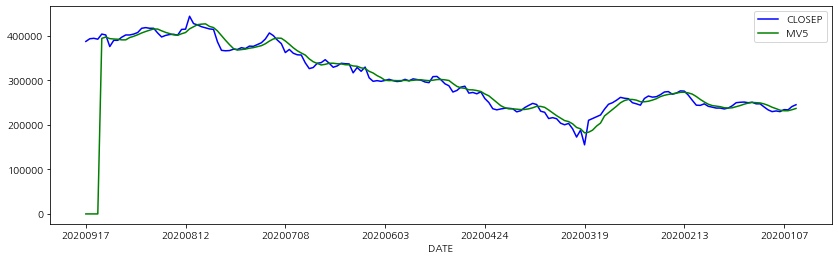

In [50]:
CJ_cj['DATE'] = CJ_cj['DATE'].astype('str')
ax1 = CJ_cj.plot(kind='line', x='DATE', y='CLOSEP', color='Blue')
ax2 = CJ_cj.plot(kind='line', x='DATE', y='MV5', color = 'Green', ax=ax1)
plt.legend()
plt.show()

- 주가의 이동평균을 5일치로 잡았기 때문에, 5일 뒤에 그 평균들이 기록됨을 알 수 있다.

- **CJ제일제당을 구해봤으니, 오뚜기를 알아보자

- 경쟁자 분석
- 동종 유사주가의 경쟁사 분석을 통해 시장기준 주가 분석



---
- 이렇게 함으로써 동종업계 대비 성장동력을 알아볼 수도 있고...
- 여기에 추가적으로 뉴스 크롤링. 시계열분석 더해주기


장단기 크로스 지점 - 장기적으로는 성장하고 있는데, 단기적으로 꺾였을 경우 악재가 있다거나 
성장모멘트가 주춤했을 수 있음 -> 이에 대한 요인을 분석하는 것이 중요 




## 3) 장단기 크로스지점 찾기
  - 주가 장단기 이평선에 관한 크로스 포인트 분석 (골든크로스, 데드크로스)
  - 이를 통해 시장에 반영된 마케팅 기준선 부여

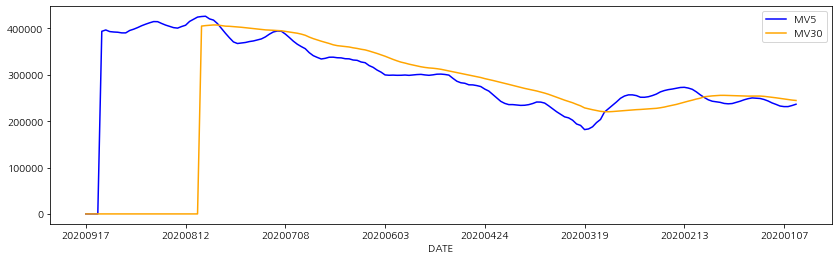

In [51]:
plt.rcParams['figure.figsize'] = (14,4)
ax1 = CJ_cj.plot(kind='line', x='DATE', y='MV5', color = 'Blue')
ax2 = CJ_cj.plot(kind='line', x='DATE', y='MV30', color='Orange', ax=ax1)
plt.legend() #mv5와 MV30이라는 선 표시해줌
plt.show()

In [61]:
#단기물이 기준, 단기물이 뚫고 들어갔으면 매도 / 올라가면 매수
#장단기 크로스포인트를 찾아서 매수매도지점 구하기 

short = CJ_cj['MV5']
long = CJ_cj['MV30']
res=[]
longday = 30

for i in range(longday):
  res.append(0)

for i in range(longday, len(short)):
  if (short[i]>long[i]):
    res.append(1)  #매수 or 보유
  else:
    res.append(-1) #매도

#Hold Position 잡기
CJ_cj['holdPos'] = res
CJ_cj.head()

,DATE,OPENP,CLOSEP,HIGHP,LOWP,VOL,MV5,MV30,holdPos
0,20200917,393000.0,387000.0,396000.0,386000.0,51334.0,0.0,0.0,0
1,20200916,395000.0,393000.0,402000.0,392500.0,48945.0,0.0,0.0,0
2,20200915,392000.0,394000.0,396000.0,388000.0,47654.0,0.0,0.0,0
3,20200914,403500.0,392000.0,404000.0,388000.0,100636.0,0.0,0.0,0
4,20200911,401500.0,403500.0,416500.0,399500.0,108033.0,393900.0,0.0,0


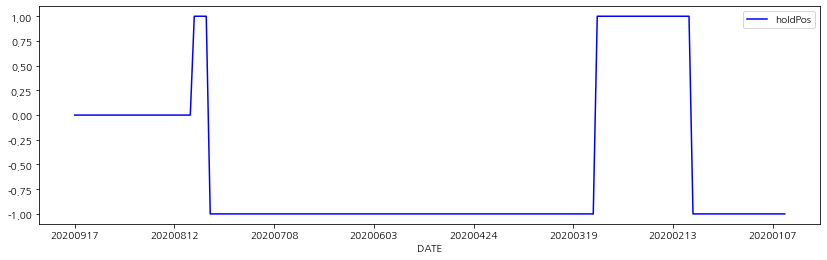

In [76]:
plt.rcParams['figure.figsize'] = (14,4)
ax = CJ_cj.plot(kind='line', x='DATE', y='holdPos', color='Blue')
mpl.rcParams['axes.unicode_minus'] = False  #마이너스 부호 처리
plt.legend()
plt.show()

#값이 -1이면 매도, 1이면 매수/보유

마케팅을 했을 때 초기효과가 없는 경우, 신차효과가 있는 기간에 

## 4) 성장동력과 크로스포인트와의 관계

- 마케팅에 얼마만큼의 효과가 있었는지, 기울기로 확인해보기

- 단기 성장성(성장비율)과 장단기 주가 모멘텀 분석
- 실질적 주가에 영향을 주는 마케팅 포인트 지점 획득
 - 단기물(ex.5일물) > 장기물(ex.60일물): 매수
 - 단기물 < 장기물: 매도

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  


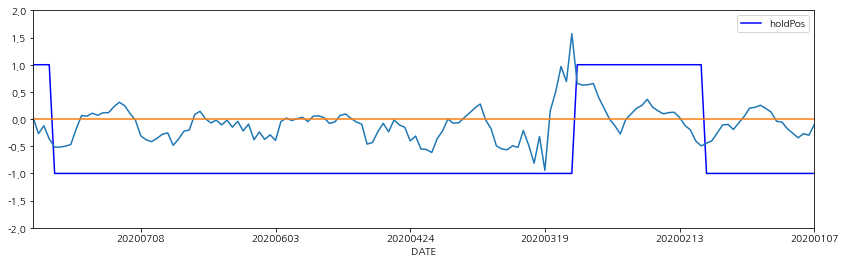

In [80]:
#성장모멘텀 - 종가기준에 영향을 주었냐 안주었냐
baseData = CJ_cj['MV5']
res = [1]

for i in range(1, len(baseData)):
  c= ((baseData[i] / baseData[i-1])-1)*20 #전일 대비 단기이평선의 상승비율
  res.append(c)

plt.rcParams['figure.figsize'] = (14,4)
ax = CJ_cj.plot(kind='line', x='DATE', y='holdPos',color = 'Blue')
plt.plot(res)
plt.plot([0,175],[0,0]) #0.0에 선을 그어주는 것
plt.xlim(30,175)
plt.ylim(-2,2)
plt.show()

#5.캔들차트
- 시가, 고가, 저가, 종가를 분석하여 마케팅의 적시적 효과를 보기 위해 진행
- 라이브러리 사용

In [81]:
from mpl_finance import candlestick_ohlc

In [102]:
lMin = 70
lMax = 108  #해당하는 날짜 조절하는 기능

cols = ['OPENP','CLOSEP', 'HIGHP','LOWP']
days = CJ_cj['DATE'].values[lMin:lMax]       #x축에 들어갈 값 = 날짜
cdata = CJ_cj[cols].values[lMin:lMax]        #첫번째 그래프의 데이터 = OP CP HP LP
voldata = CJ_cj['VOL'].values[lMin:lMax]     #두번째 그래프의 데이터 = VAL(거래량)
gmv5 = CJ_cj['MV5'].values[lMin:lMax]        #5일이평선
gmv30 = CJ_cj['MV30'].values[lMin:lMax]      #30일이평선
xtic = np.arange(0, len(days), step=5)
#xdays=[days[i]-20000000 for i in xtic]       #200916과 같은 형태로 만들어주는 작업
print(type(days))

<class 'numpy.ndarray'>


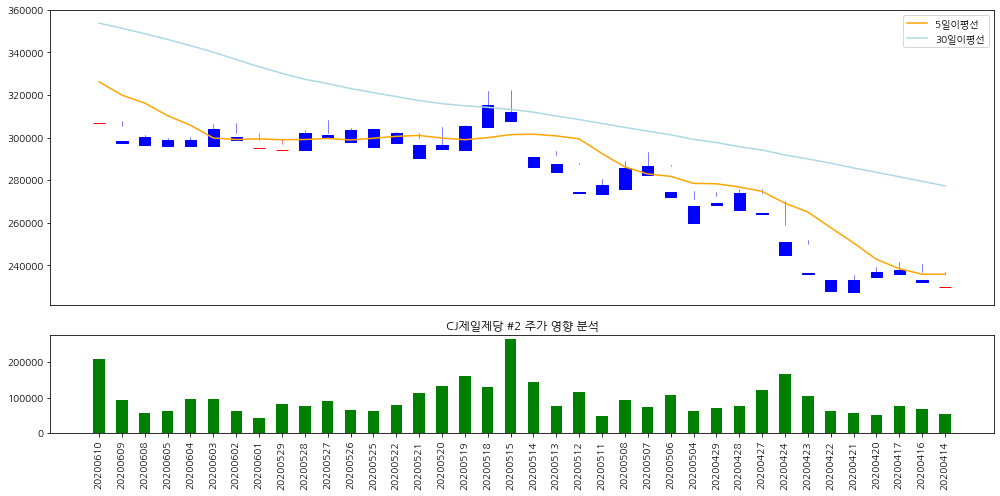

In [108]:
#그림 비율
fig = plt.figure(figsize=(14,7))

#grid가 2행 1열짜리 높이비율 3:1로 생성
gs = gridspec.GridSpec(2,1,height_ratios = [3,1])

#x축 선정
axis=[]
axis.append(plt.subplot(gs[0]))

#axis[0]을 그리드 공유
axis.append(plt.subplot(gs[1], sharex=axis[0]))

#공유 x축 표시를 없애기 (위의 차트에 x축 값이 없어짐!)
axis[0].get_xaxis().set_visible(False)

#candle stick용 데이터 만들기
x = np.arange(len(cdata))
xa = np.reshape(x, (-1,1))
ohlc = np.hstack((xa, cdata))

#Drawing candle stick
candlestick_ohlc(axis[0], ohlc, width=0.5, colorup='red', colordown='blue')
axis[1].bar(days, voldata, color='g', width=0.5)
axis[0].plot(gmv5, label='5일이평선', color='orange')
axis[0].plot(gmv30, label='30일이평선', color='lightblue')
# axis[0].axvline(x=18, label='dd') #세로선 추가

axis[0].legend()
plt.title('CJ제일제당 #2 주가 영향 분석')  #2번 이벤트가 주가에 준 영향
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

- 분석 추가

#6.경쟁사 주식 알아보기
- 오뚜기: 007310

## 1)주식크롤링 + BigQuery 연동

In [110]:
Otg = sev_page_crawling('007310',610)
Otg

,DATE,CLOSEP,COMPARE,OPENP,HIGHP,LOWP,VOL
0,20200918,578000.0,0.0,578000.0,578000.0,578000.0,0.0
1,20200917,578000.0,7000.0,585000.0,585000.0,578000.0,3501.0
2,20200916,585000.0,1000.0,585000.0,587000.0,582000.0,3507.0
3,20200915,586000.0,4000.0,586000.0,592000.0,586000.0,3666.0
4,20200914,590000.0,1000.0,587000.0,594000.0,582000.0,3345.0
...,...,...,...,...,...,...,...
6089,19960629,20200.0,100.0,20200.0,20200.0,20200.0,20.0
6090,19960628,20300.0,200.0,20500.0,20500.0,20300.0,4210.0
6091,19960627,20500.0,1000.0,21500.0,21500.0,20500.0,620.0
6092,19960626,21500.0,0.0,21500.0,21500.0,21500.0,3450.0


In [112]:
Otg.to_gbq(destination_table='NaverStock.Ottogi',
               project_id='stockcj',
               if_exists='replace')

1it [00:03,  3.92s/it]


In [116]:
project_id='stockcj'
sql="""
SELECT DATE, OPENP, CLOSEP, HIGHP, LOWP, VOL
FROM `NaverStock.Ottogi`
WHERE DATE>20200101
ORDER BY DATE desc
LIMIT 250
"""

Otg_df = pd.read_gbq(sql, project_id=project_id, dialect='standard')
Otg_df.head()

,DATE,OPENP,CLOSEP,HIGHP,LOWP,VOL
0,20200918,578000.0,578000.0,578000.0,578000.0,0.0
1,20200917,585000.0,578000.0,585000.0,578000.0,3501.0
2,20200916,585000.0,585000.0,587000.0,582000.0,3507.0
3,20200915,586000.0,586000.0,592000.0,586000.0,3666.0
4,20200914,587000.0,590000.0,594000.0,582000.0,3345.0


## 2)CJ제일제당-오뚜기 비교

In [117]:
CJ_OTG = pd.DataFrame([CJ_cj['DATE'], CJ_cj['CLOSEP'], Otg_df['CLOSEP']]).T
CJ_OTG.columns = ['DATE','CJ_CLOSEP','OTG_CLOSEP']
CJ_OTG.head(10)

,DATE,CJ_CLOSEP,OTG_CLOSEP
0,20200917,387000,578000
1,20200916,393000,578000
2,20200915,394000,585000
3,20200914,392000,586000
4,20200911,403500,590000
5,20200910,401500,589000
6,20200909,375500,596000
7,20200908,389500,587000
8,20200907,389500,582000
9,20200904,396500,582000


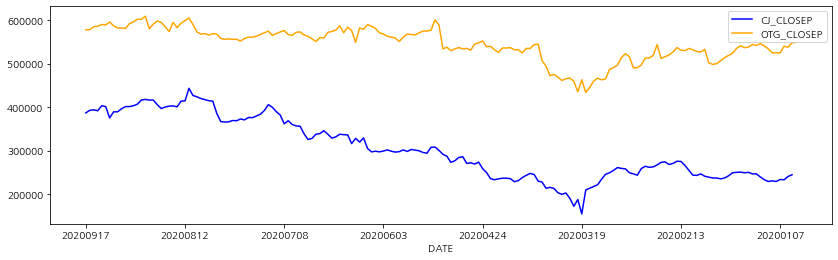

In [118]:
plt.rcParams['figure.figsize']=(14,4)
ax1 = CJ_OTG.plot(kind='line',x='DATE',y='CJ_CLOSEP',color='Blue')
ax2 = CJ_OTG.plot(kind='line', x='DATE',y='OTG_CLOSEP', color='Orange', ax=ax1)
plt.legend()
plt.show()

- 오뚜기는 1주가 584,000원이다. (200918 개장 기준)
- CJ제일제당은 1주가 386,500원이다.(200918 개장 기준)
- 1주 간 가격차이가 크기 때문에, 가격간 차이를 보기보다는 전반적인 흐름을 살펴보는 것이 중요하다고 생각함.
- 변동의 차이를 보는 것이 중요할듯.